## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [56]:
import numpy as np
import pandas as pd
kchouse = pd.read_csv('data/kc_house_data.csv')
kchouse.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [57]:
kchouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [58]:
kc_new = kchouse.drop(['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], axis=1)
kc_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   19221 non-null  float64
 8   condition    21597 non-null  int64  
 9   grade        21597 non-null  int64  
 10  yr_built     21597 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 1.8 MB


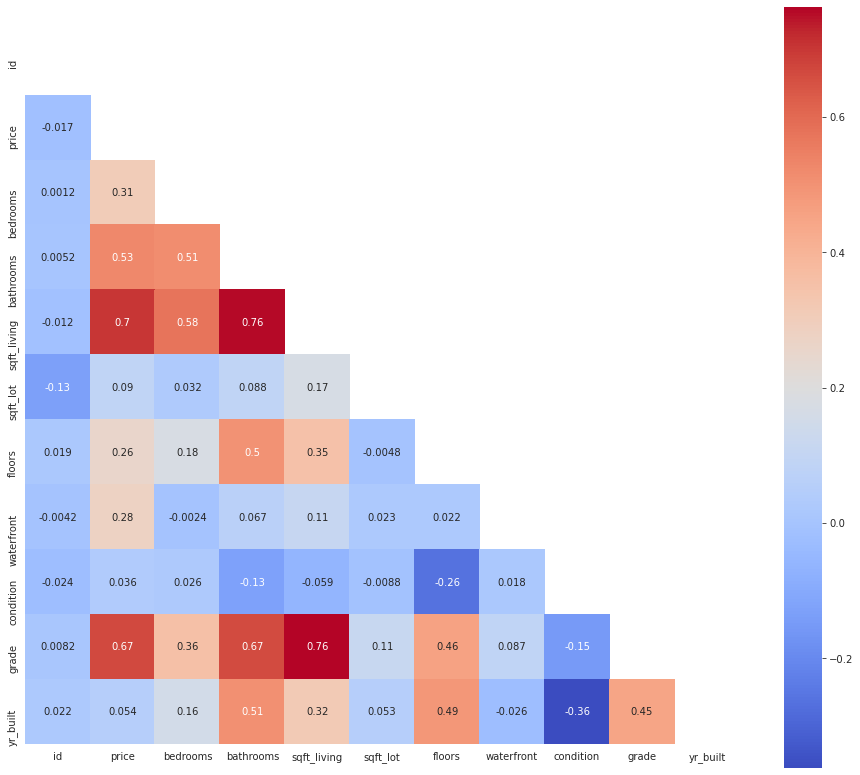

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = kc_new.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):

    f, ax = plt.subplots(figsize=(16, 14))

    ax = sns.heatmap(corr, mask=mask, square=True, annot = True, cmap = 'coolwarm')

In [4]:
kc_new.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,3.409825,7.657915,1970.999676
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.650546,1.173200,29.375234
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,1997.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000


In [ ]:
#some notes: # Mean price is $540,296.57 
             # std $367368.14
             # min $78,000.0 
             # 25% $322,000.0
             # 50% $450,000.0,
             # 75% $645000.0
             # max $7,700,000.0

In [59]:
kc_new.isna().value_counts()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  condition  grade  yr_built
False  False  False     False      False        False     False   False       False      False  False       19221
                                                                  True        False      False  False        2376
dtype: int64

In [60]:
kc_new['waterfront'] = kc_new['waterfront'].fillna(0.0)
kc_new.isna().value_counts()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  condition  grade  yr_built
False  False  False     False      False        False     False   False       False      False  False       21597
dtype: int64

In [61]:
kc_new['id'].value_counts()

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [62]:
kc_new.drop_duplicates(subset = 'id', inplace = True)

In [63]:
kc_new

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,2009
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0.0,3,8,2004


In [65]:
df = kc_new.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

In [66]:
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(grade, sqft_living)",0.762477
"(sqft_living, bathrooms)",0.755522


In [ ]:
### big ol scatter matrix to discern between continuous/categorical variables

array([[<AxesSubplot:xlabel='id', ylabel='id'>,
        <AxesSubplot:xlabel='price', ylabel='id'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='id'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='id'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='id'>,
        <AxesSubplot:xlabel='sqft_lot', ylabel='id'>,
        <AxesSubplot:xlabel='floors', ylabel='id'>,
        <AxesSubplot:xlabel='waterfront', ylabel='id'>,
        <AxesSubplot:xlabel='condition', ylabel='id'>,
        <AxesSubplot:xlabel='grade', ylabel='id'>,
        <AxesSubplot:xlabel='yr_built', ylabel='id'>],
       [<AxesSubplot:xlabel='id', ylabel='price'>,
        <AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='price'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_lot', ylabel='price'>,
        <AxesSubplot:xlabel='floors', ylabel='price'>,
        <AxesSubplot

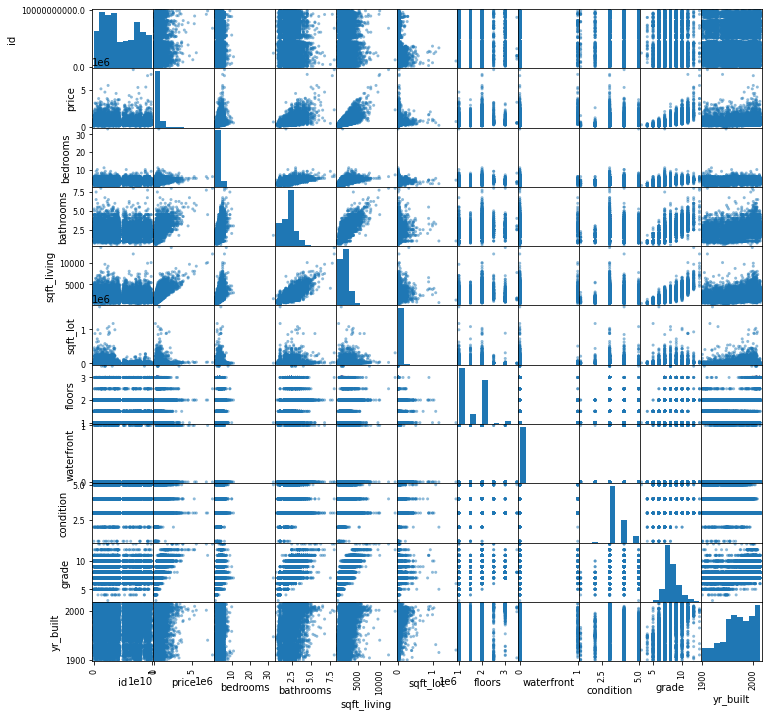

In [67]:
pd.plotting.scatter_matrix(kc_new, figsize=[12,12])

In [ ]:
### Check for outliers ###

In [68]:
import matplotlib.pyplot as plt

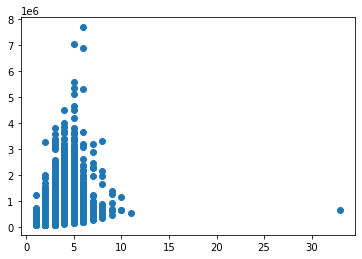

In [70]:
plt.scatter(x = kc_new['bedrooms'], y = kc_new['price'])


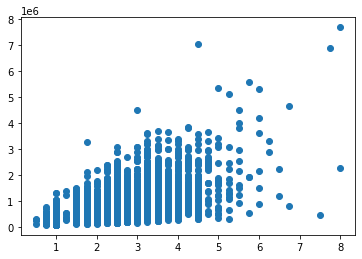

In [16]:
plt.scatter(x = kc_new['bathrooms'], y = kc_new['price'])


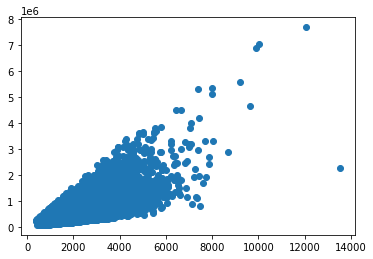

In [17]:
plt.scatter(x = kc_new['sqft_living'], y = kc_new['price'])

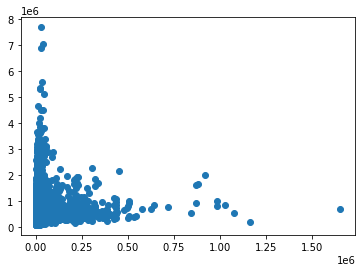

In [18]:
plt.scatter(x = kc_new['sqft_lot'], y = kc_new['price'])


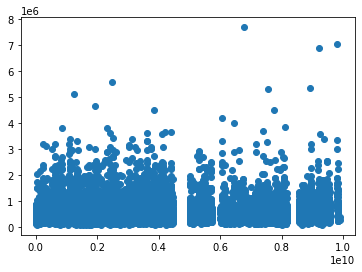

In [19]:
plt.scatter(x = kc_new['id'], y = kc_new['price'])


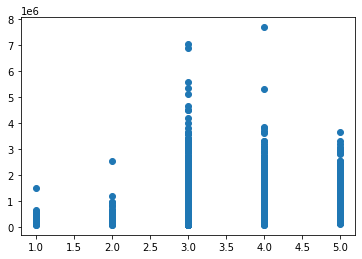

In [20]:
plt.scatter(x = kc_new['condition'], y = kc_new['price'])

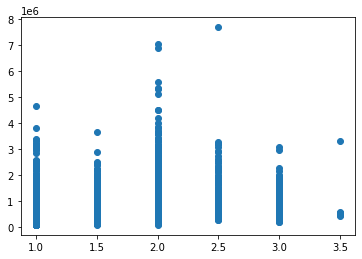

In [21]:
plt.scatter(x = kc_new['floors'], y = kc_new['price'])


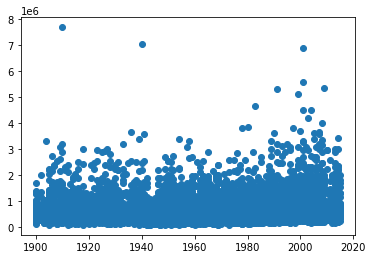

In [22]:
plt.scatter(x = kc_new['yr_built'], y = kc_new['price'])


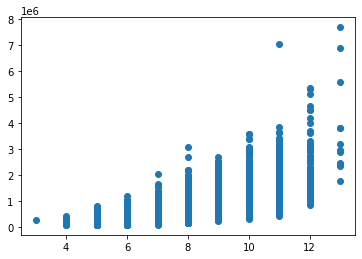

In [23]:
plt.scatter(x = kc_new['grade'], y = kc_new['price'])


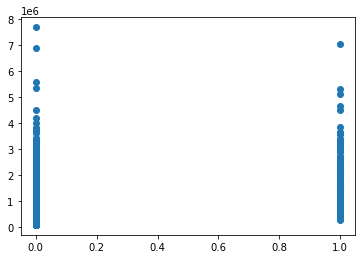

In [24]:
plt.scatter(x = kc_new['waterfront'], y = kc_new['price'])

In [71]:
from scipy import stats
z = np.abs(stats.zscore(kc_new))
z

threshold = 3
print(np.where(z >= 3))

kc_new_out = kc_new[(z<=3).all(axis = 1)]
kc_new_out

(array([    5,     5,    21, ..., 21384, 21384, 21397], dtype=int64), array([3, 4, 1, ..., 4, 7, 4], dtype=int64))


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,2009
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0.0,3,8,2004


In [72]:
continuous = ['price',  'sqft_lot', 'sqft_living']
categoricals = ['waterfront', 'condition', 'grade',  'yr_built','bathrooms', 'floors','bedrooms']
kccat = kc_new_out[categoricals]
kccon = kc_new_out[continuous]

In [27]:
kccat = kccat.set_index(kc_new['id'])
kccon = kccon.set_index(kc_new['id'])

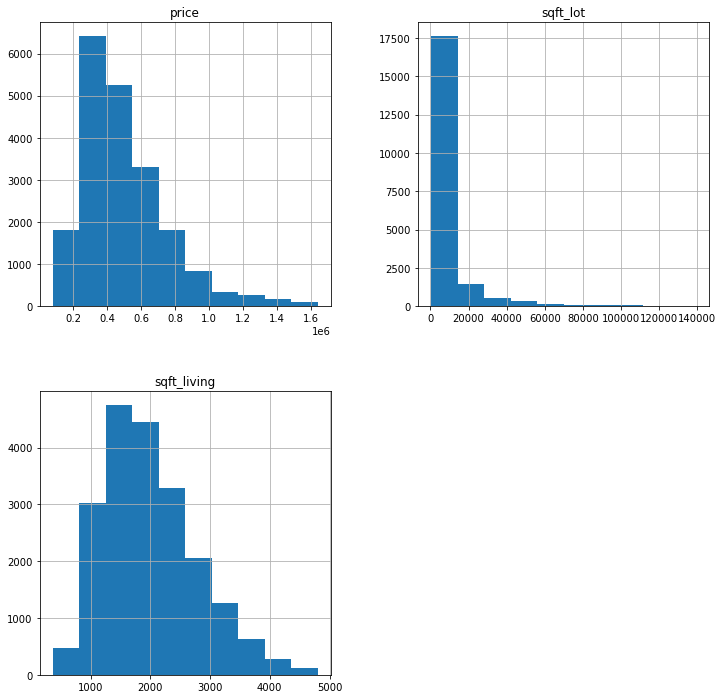

In [73]:
kccon.hist(figsize = [12,12]);

In [74]:
#### doing an initial model just for funsies ####
from statsmodels.formula.api import ols

outcome = 'price'
predictors = kc_new_out.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model = ols(formula=formula, data=kc_new_out).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     3364.
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:22:46   Log-Likelihood:            -2.7205e+05
No. Observations:               20316   AIC:                         5.441e+05
Df Residuals:                   20306   BIC:                         5.442e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.597e+06   9.88e+04     56.667      0.000     5.4e+06    5.79e+06
id          -1.308e-06    3.9e-07     -3.349      0.001   -2.07e-06   -5.42e-07
bedrooms    -2.453e+04   1688.864    -14.524      0.000   -2.78e+04   -2.12e+04
bathrooms    3.886e+04   2700.659     14.390      0.000    3.36e+04    4.42e+04
sqft_living   117.6854      2.765     42.562      0.000     112.266     123.105
sqft_lot       -0.8062      0.087     -9.270      0.000      -0.977      -0.636
floors       3.049e+04   2626.600     11.607      0.000    2.53e+04    3.56e+04
waterfront   6.749e-11   3.24e-12     20.854      0.000    6.12e-11    7.38e-11
condition    2.086e+04   1888.470     11.046      0.000    1.72e+04    2.46e+04
grade        1.208e+05   1674.706     72.116      0.000    1.17e+05    1.24e+05
yr_built    -3221.6743     50.851    -63.355      0.000   -3321.346   -3122.002
==============================================================================
Omnibus:                     3250.739   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9030.891
Skew:                           0.865   Prob(JB):                         0.00
Kurtosis:                       5.771   Cond. No.                     2.52e+26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.5e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [75]:
# log and normalize features
log_names = [f'{column}_log' for column in kccon.columns]

kccon_log = np.log(kccon)
kccon_log.columns = log_names

log_names

['price_log', 'sqft_lot_log', 'sqft_living_log']

In [84]:
kccon_log

,price_log,sqft_lot_log,sqft_living_log
id,,,
7129300520,12.309982,8.639411,7.073270
6414100192,13.195614,8.887653,7.851661
5631500400,12.100712,9.210340,6.646391
2487200875,13.311329,8.517193,7.580700
1954400510,13.142166,8.997147,7.426549
...,...,...,...
263000018,12.793859,7.030857,7.333023
6600060120,12.899220,8.667852,7.745003
1523300141,12.904459,7.207860,6.927558


In [76]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

kc_log_norm = kccon_log.apply(normalize)

array([[<AxesSubplot:title={'center':'price_log'}>,
        <AxesSubplot:title={'center':'sqft_lot_log'}>],
       [<AxesSubplot:title={'center':'sqft_living_log'}>, <AxesSubplot:>]],
      dtype=object)

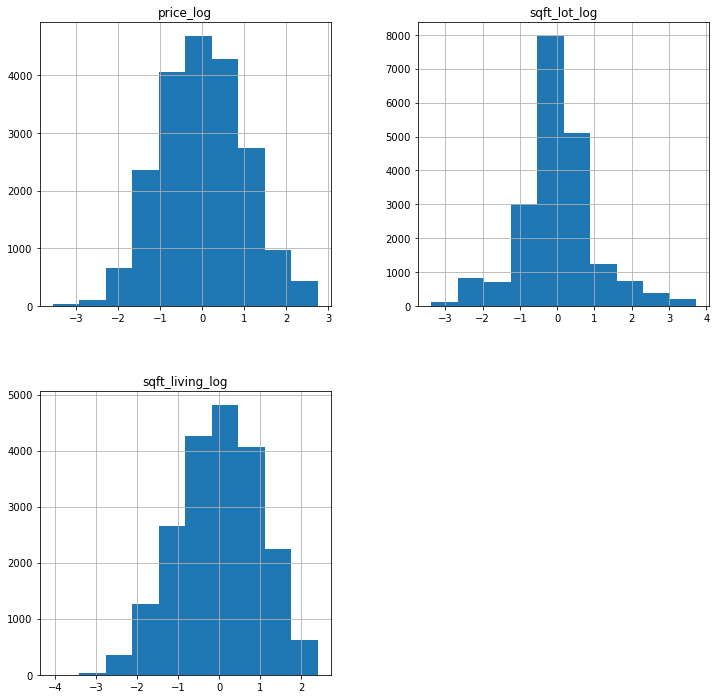

In [77]:
kc_log_norm.hist(figsize = [12,12])

In [ ]:
### check features with statsmodels ###

# OLS with Statsmodels #

In [78]:
from statsmodels.formula.api import ols
import scipy.stats as stats
import statsmodels.api as sm


In [ ]:
### ols for continuous features

In [79]:
outcome = 'price_log'
predictors = kc_log_norm.drop('price_log', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model = ols(formula=formula, data=kc_log_norm).fit()
model.summary()

### OLS Regression Results for continuous variables ####

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     7014.
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:23:27   Log-Likelihood:                -23493.
No. Observations:               20316   AIC:                         4.699e+04
Df Residuals:                   20313   BIC:                         4.702e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.405e-15      0.005   -2.6e-13      1.000      -0.011       0.011
sqft_lot_log       -0.1337      0.006    -23.623      0.000      -0.145      -0.123
sqft_living_log     0.6666      0.006    117.782      0.000       0.656       0.678
==============================================================================
Omnibus:                      185.528   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.618
Skew:                          -0.010   Prob(JB):                     6.43e-27
Kurtosis:                       2.623   Cond. No.                         1.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
### scikit linear regression with test/train ####

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit, cross_validate

baseline_model = LinearRegression()
splitter = ShuffleSplit(n_splits=3, test_size=0.20, random_state=0)
y = kc_log_norm['price_log']
X = kc_log_norm.drop('price_log', axis = 1)
model_scores = cross_validate(
    estimator=baseline_model,
    X=X,
    y=y,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", model_scores["train_score"].mean())
print("Validation score:", model_scores["test_score"].mean())


Current Model
Train score:      0.40618254475205706
Validation score: 0.4173416135590153


In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
X = X
x_cols = ['sqft_lot_log', 'sqft_living_log']
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('sqft_lot_log', 1.119585717098445), ('sqft_living_log', 1.1195857170984442)]

In [ ]:
#### in the end, there is no significant difference between the Rsquared
#### values with or without bathroom #

# ------------ Categorical -------------- #

array([[<AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'floors'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

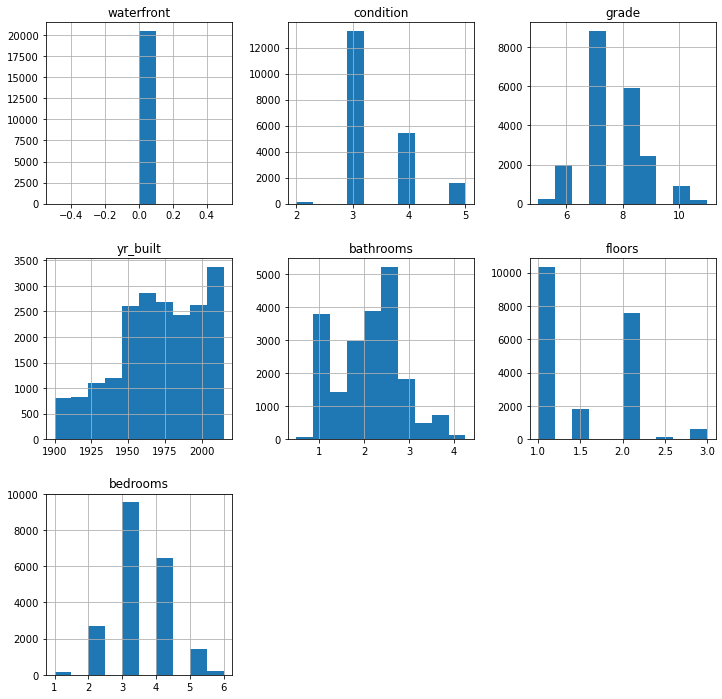

In [62]:
kccat.hist(figsize = [12,12])

In [ ]:
kccat.info()

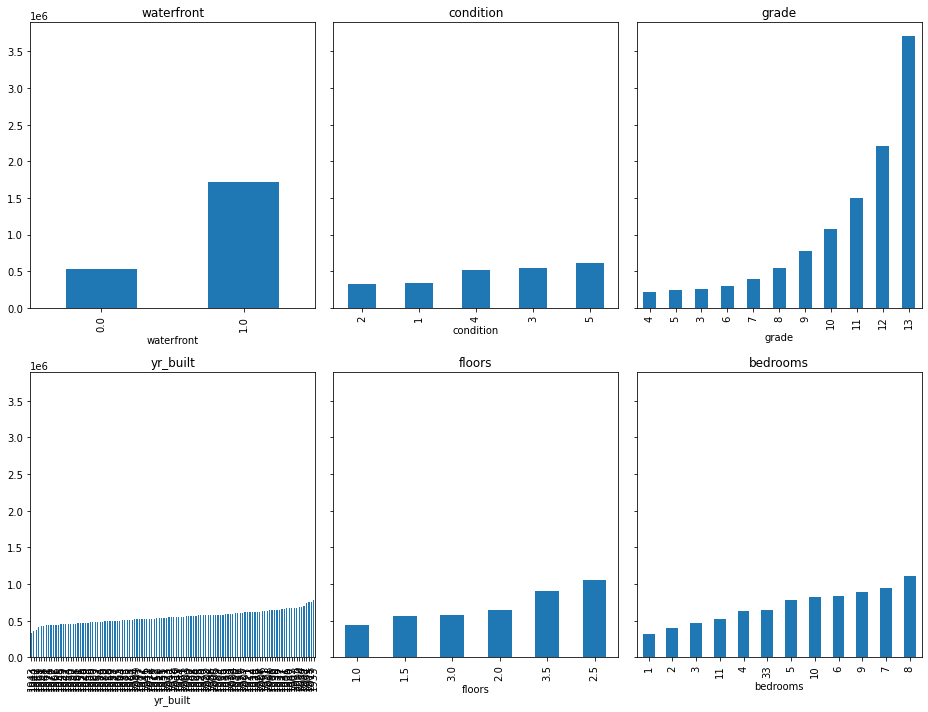

In [81]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(13,10), sharey=True)

categoricals = ['waterfront', 'condition', 'grade',  'yr_built', 'floors', 'bedrooms', 'bathrooms']

for col, ax in zip(categoricals, axes.flatten()):
    (kc_new.groupby(col)               # group values together by column of interest
         .mean()['price']        # take the mean of the saleprice for each group
         .sort_values()              # sort the groups in ascending order
         .plot
         .bar(ax=ax))                # create a bar graph on the ax
    
    ax.set_title(col)                # Make the title the name of the column
    
fig.tight_layout()

In [106]:
kccat['condition'] = kccat['condition'].astype(str).astype(int)
kccat['waterfront'] = kccat['waterfront'].astype(str).astype(int)
kccat['grade'] = kccat['grade'].astype(str).astype(int)
kccat['floors'] = kccat['floors'].astype(str).astype(int)
kccat['yr_built'] = kccat['yr_built'].astype(str).astype(int)
kccat['bedrooms'] = kcacat['bedrooms'].astype(str).astype(int)
kccat['bathrooms'] = kccat['bathrooms'].astype(str).astype(int)

In [82]:
condition_ohe = pd.get_dummies(kccat['condition'], prefix = 'condition', drop_first=True)
waterfront_ohe =pd.get_dummies(kccat['waterfront'], prefix = 'waterfront', drop_first=True)
grade_ohe= pd.get_dummies(kccat['grade'], prefix = 'grade', drop_first=True)
floors_ohe = pd.get_dummies(kccat['floors'], prefix = 'floors', drop_first=True)
yr_ohe = pd.get_dummies(kccat['yr_built'], prefix = 'yr_built', drop_first=True)
bed_ohe = pd.get_dummies(kccat['bedrooms'], prefix = 'bedrooms', drop_first=True)
bath_ohe = pd.get_dummies(kccat['bathrooms'], prefix = 'bathrooms', drop_first=True)

In [83]:
ohe_concat = pd.concat([condition_ohe, waterfront_ohe, grade_ohe, floors_ohe, yr_ohe, bed_ohe, bath_ohe], axis = 1)


In [84]:
preprocessed = pd.concat([kc_log_norm, ohe_concat], axis=1)

In [85]:
preprocessed.columns = preprocessed.columns.str.replace('.','_')

In [86]:
colnames = preprocessed.columns

In [87]:
outcome = 'price_log'
predictors = preprocessed.drop('price_log', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model = ols(formula=formula, data=preprocessed).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     210.9
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:24:36   Log-Likelihood:                -19242.
No. Observations:               20316   AIC:                         3.879e+04
Df Residuals:                   20165   BIC:                         3.998e+04
Df Model:                         150                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.4121      0.330     -4.280      0.000      -2.059      -0.765
sqft_lot_log       -0.0554      0.006     -9.008      0.000      -0.067      -0.043
sqft_living_log     0.3752      0.009     39.775      0.000       0.357       0.394
condition_3         0.3496      0.052      6.658      0.000       0.247       0.452
condition_4         0.4290      0.053      8.138      0.000       0.326       0.532
condition_5         0.5266      0.054      9.670      0.000       0.420       0.633
grade_6             0.4027      0.046      8.766      0.000       0.313       0.493
grade_7             0.9604      0.046     20.864      0.000       0.870       1.051
grade_8             1.4598      0.048     30.613      0.000       1.366       1.553
grade_9             1.9897      0.050     39.798      0.000       1.892       2.088
grade_10            2.3680      0.054     43.825      0.000       2.262       2.474
grade_11            2.6781      0.068     39.598      0.000       2.546       2.811
floors_1_5         -0.0001      0.019     -0.006      0.995      -0.037       0.036
floors_2_0         -0.0017      0.015     -0.111      0.912      -0.032       0.028
floors_2_5          0.0397      0.059      0.675      0.499      -0.075       0.155
floors_3_0          0.2655      0.032      8.176      0.000       0.202       0.329
yr_built_1901      -0.0531      0.142     -0.375      0.707      -0.331       0.224
yr_built_1902      -0.0759      0.142     -0.536      0.592      -0.353       0.202
yr_built_1903      -0.2405      0.117     -2.058      0.040      -0.470      -0.011
yr_built_1904       0.0046      0.119      0.039      0.969      -0.228       0.237
yr_built_1905      -0.1030      0.103     -0.996      0.319      -0.306       0.100
yr_built_1906       0.0439      0.097      0.451      0.652      -0.147       0.235
yr_built_1907      -0.0280      0.106     -0.265      0.791      -0.235       0.179
yr_built_1908      -0.2130      0.099     -2.154      0.031      -0.407      -0.019
yr_built_1909      -0.0562      0.097     -0.581      0.561      -0.246       0.133
yr_built_1910      -0.1243      0.090     -1.381      0.167      -0.301       0.052
yr_built_1911      -0.0770      0.103     -0.747      0.455      -0.279       0.125
yr_built_1912      -0.1536      0.102     -1.507      0.132      -0.353       0.046
yr_built_1913      -0.3318      0.109     -3.034      0.002      -0.546      -0.117
yr_built_1914      -0.1624      0.114     -1.428      0.153      -0.385       0.061
yr_built_1915      -0.1793      0.109     -1.650      0.099      -0.392       0.034
yr_built_1916      -0.0802      0.101     -0.792      0.428      -0.279       0.118
yr_built_1917      -0.2045      0.110     -1.861      0.063      -0.420       0.011
yr_built_1918      -0.2227      0.092     -2.427      0.015

In [88]:
X = preprocessed.drop('price_log', axis=1)
y = preprocessed['price_log']

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(len(X_train), len(X_test), len(y_train), len(y_test))

15237 5079 15237 5079


In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit, cross_validate

splitter = ShuffleSplit(n_splits=3, test_size=0.20, random_state=0)
baseline_model = LinearRegression()

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.6134914525544201
Validation score: 0.605176356538412


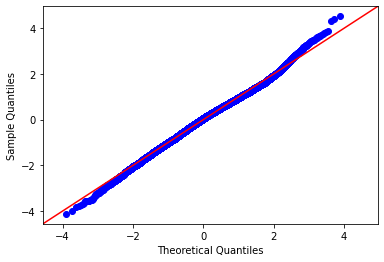

In [91]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [92]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype='float64')
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [93]:
X = X_train
y = y_train

result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

Add  grade_7                        with p-value 0.0
Add  bathrooms_1_0                  with p-value 0.0
Add  sqft_living_log                with p-value 0.0
Add  grade_6                        with p-value 6.11152e-173
Add  grade_8                        with p-value 3.7665e-113
Add  sqft_lot_log                   with p-value 1.25933e-81
Add  bathrooms_2_5                  with p-value 1.00818e-69
Add  condition_5                    with p-value 2.67373e-54
Add  bedrooms_2                     with p-value 8.85433e-42
Add  floors_1_5                     with p-value 5.68287e-48
Add  grade_10                       with p-value 3.32603e-31
Add  grade_11                       with p-value 4.10296e-30
Add  grade_9                        with p-value 1.81819e-149
Add  condition_4                    with p-value 6.28183e-38
Add  floors_2_0                     with p-value 1.51659e-16
Add  yr_built_1924                  with p-value 3.29139e-15
Add  yr_built_1978                  with p-val

In [94]:
X_fin = X[result]
X_with_intercept = sm.add_constant(X_fin)
model = sm.OLS(y,X_with_intercept).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     246.0
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:11:42   Log-Likelihood:                -14554.
No. Observations:               15237   AIC:                         2.930e+04
Df Residuals:                   15142   BIC:                         3.002e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.6682      0.081    -20.676      0.000      -1.826      -1.510
grade_7             0.9176      0.053     17.195      0.000       0.813       1.022
sqft_living_log     0.3699      0.010     37.860      0.000       0.351       0.389
grade_6             0.3513      0.054      6.557      0.000       0.246       0.456
grade_8             1.4075      0.055     25.485      0.000       1.299       1.516
sqft_lot_log       -0.0529      0.007     -8.074      0.000      -0.066      -0.040
bathrooms_2_5      -0.0757      0.016     -4.723      0.000      -0.107      -0.044
condition_5         0.5289      0.064      8.248      0.000       0.403       0.655
bedrooms_2          0.1448      0.018      8.072      0.000       0.110       0.180
grade_10            2.3134      0.062     37.162      0.000       2.191       2.435
grade_11            2.6231      0.077     33.865      0.000       2.471       2.775
grade_9             1.9368      0.058     33.412      0.000       1.823       2.050
condition_4         0.4170      0.062      6.704      0.000       0.295       0.539
floors_2_0         -0.0665      0.015     -4.324      0.000      -0.097      -0.036
yr_built_1924       0.9978      0.066     15.176      0.000       0.869       1.127
yr_built_1978      -0.1757      0.039     -4.494      0.000      -0.252      -0.099
yr_built_1990      -0.2908      0.043     -6.783      0.000      -0.375      -0.207
yr_built_1926       0.8814      0.058     15.167      0.000       0.767       0.995
yr_built_1925       0.8689      0.059     14.686      0.000       0.753       0.985
yr_built_1906       1.0164      0.080     12.715      0.000       0.860       1.173
yr_built_1910       0.8658      0.066     13.093      0.000       0.736       0.995
yr_built_1927       0.9146      0.072     12.695      0.000       0.773       1.056
yr_built_1919       0.9498      0.081     11.694      0.000       0.791       1.109
yr_built_1923       0.9523      0.083     11.440      0.000       0.789       1.115
yr_built_1907       0.9617      0.090     10.691      0.000       0.785       1.138
yr_built_1952       0.6062      0.054     11.295      0.000       0.501       0.711
yr_built_1941       0.7070      0.059     12.016      0.000       0.592       0.822
yr_built_1916       0.9280      0.085     10.981      0.000       0.762       1.094
yr_built_1909       0.8612      0.082     10.466      0.000       0.700       1.022
yr_built_1946       0.7431      0.066     11.217      0.000       0.613       0.873
yr_built_1950       0.5594      0.048     11.632      0.000       0.465       0.654
yr_built_1951       0.5781      0.051     11.262      0.000       0.477       0.679
yr_built_1905       0.8568      0.085     10.040      0.000       0.690       1.024
yr_built_1940       0.6385      0.059     10.791      0.000

In [100]:
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_fin,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.604421027630188
Validation score: 0.6001690935355484


# Stepwise Feature Selection with Scikit #

In [101]:
from sklearn.feature_selection import RFE

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 100)
selector = selector.fit(X, y.values.ravel()) # convert y to 1d np array to prevent DataConversionWarning
selector.support_ 

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True,  True,  True, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [102]:
selected_columns = X.columns[selector.support_ ]
linreg.fit(X[selected_columns],y)

LinearRegression()

In [103]:
yhat = linreg.predict(X[selected_columns])

In [104]:
SS_Residual = np.sum((y-yhat)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X[selected_columns].shape[1]-1)

In [105]:
r_squared

0.6049603192074191

In [106]:
adjusted_r_squared

0.6023503847412948